2023-02-07 <br/>
Big Tech Stock Prices <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-02-07/readme.md

Advanced Financial chart - Completed 

https://medium.com/@lucasjamar47/advanced-tips-for-candlestick-plots-in-python-66977793bee 

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-07/big_tech_stock_prices.csv")
df.head()

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [3]:
ohlc= df[df.stock_symbol == "AAPL"]

In [4]:
# Apple stock prices in 2022
import copy
ohlc = copy.deepcopy(df[(df.stock_symbol == "AAPL") & (df.date).between("2022-01-01", "2022-11-31")])

In [5]:
# Financial calculations 
ohlc["previousClose"] = ohlc["close"].shift(1)
ohlc["color"] = np.where(ohlc["close"] > ohlc["previousClose"], "green", "red")
ohlc["fill"] = np.where(ohlc["close"] > ohlc["open"], "rgba(255, 0, 0, 0)", ohlc["color"])
ohlc["Percentage"] = ohlc["volume"]*100/ohlc["volume"].sum()
price_bins = ohlc.copy()
price_bins["close"] = price_bins["close"].round()
price_bins = price_bins.groupby("close", as_index=False)["volume"].sum()
price_bins["Percentage"] = price_bins["volume"]*100/price_bins["volume"].sum()

In [6]:
fig = go.Figure()
for index, row in ohlc.iterrows():
    color = dict(fillcolor=row["fill"], line=dict(color=row["color"]))
    fig.add_trace(
        go.Candlestick(
            x=[index],
            open=[row["open"]],
            high=[row["high"]],
            low=[row["low"]],
            close=[row["close"]],
            increasing=color,
            decreasing=color,
            name="AAPL",
            showlegend=False,
            legendgroup="Hollow Candlesticks"
        )
    )
    
fig.update_layout(title = "Hollow Candlesticks")

fig.show()

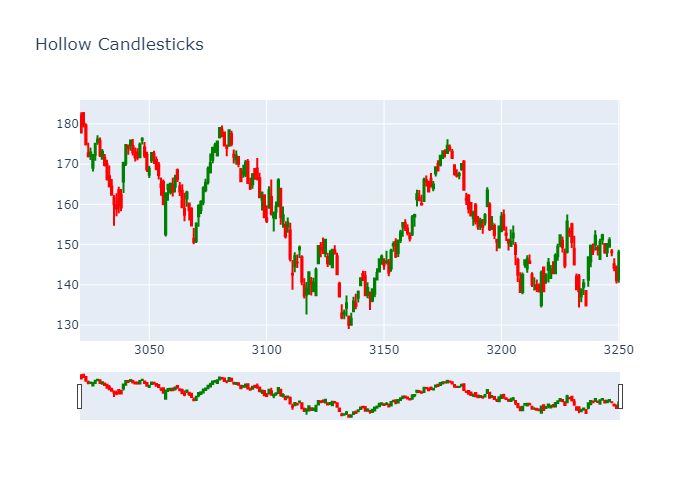

In [7]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [8]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=ohlc.index,
        y=ohlc["volume"],
        text=ohlc["Percentage"],
        marker_line_color=ohlc["color"],
        marker_color=ohlc["fill"],
        name="Volume",
        texttemplate="%{text:.2f}%",
        hoverinfo="x+y",
        textfont=dict(color="white")
    )
)
fig.update_layout(title = "Volume Chart")

fig.show()

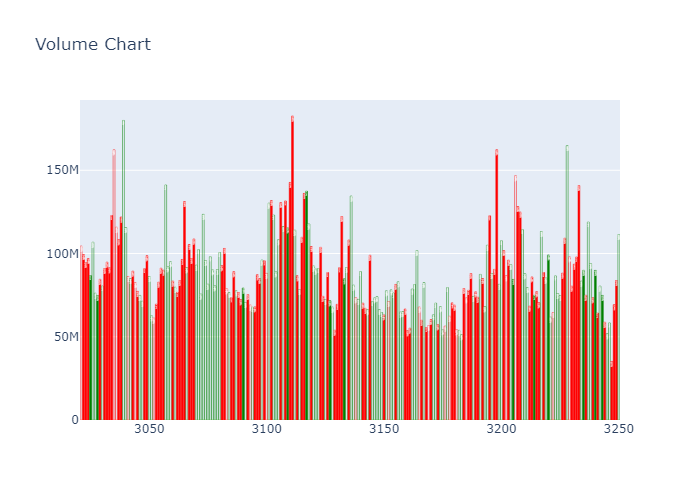

In [9]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [10]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        y=price_bins["close"],
        x=price_bins["volume"],
        text=price_bins["Percentage"],
        name="Total Price by Volume",
        orientation="h",
        marker_color="orange",
        texttemplate="%{text:.2f}% @ %{y}",
        hoverinfo="x+y"
    )
)
fig.update_layout(title = "Price by Volume")

fig.show()

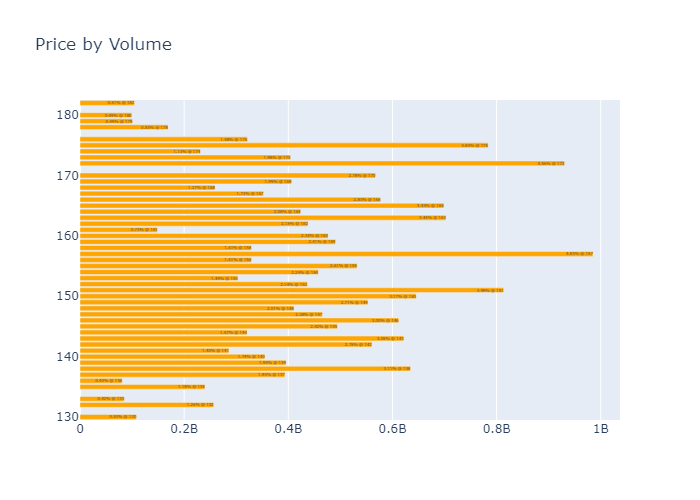

In [11]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [12]:
from plotly.subplots import make_subplots

# Combining all together 
fig = make_subplots(
    rows=2,
    cols=2,
    shared_xaxes="columns",
    shared_yaxes="rows",
    column_width=[0.8, 0.2],
    row_heights=[0.8, 0.2],
    horizontal_spacing=0,
    vertical_spacing=0,
    subplot_titles=["Candlestick", "Price Bins", "Volume", ""]
)
showlegend = True
for index, row in ohlc.iterrows():
    color = dict(fillcolor=row["fill"], line=dict(color=row["color"]))
    fig.add_trace(
        go.Candlestick(
            x=[index],
            open=[row["open"]],
            high=[row["high"]],
            low=[row["low"]],
            close=[row["close"]],
            increasing=color,
            decreasing=color,
            showlegend=showlegend,
            name="AAPL",
            legendgroup="Hollow Candlesticks"
        ),
        row=1,
        col=1
    )
    showlegend = False
fig.add_trace(
    go.Bar(
        x=ohlc.index,
        y=ohlc["volume"],
        text=ohlc["Percentage"],
        marker_line_color=ohlc["color"],
        marker_color=ohlc["fill"],
        name="Volume",
        texttemplate="%{text:.2f}%",
        hoverinfo="x+y",
        textfont=dict(color="white")
    ),
    col=1,
    row=2,
)
fig.add_trace(
    go.Bar(
        y=price_bins["close"],
        x=price_bins["volume"],
        text=price_bins["Percentage"],
        name="Total Price by Volume",
        orientation="h",
        marker_color="orange",
        texttemplate="%{text:.2f}% @ %{y}",
        hoverinfo="x+y"
    ),
    col=2,
    row=1,
)
fig.update_xaxes(
    rangebreaks=[dict(bounds=["sat", "mon"])],
    rangeslider_visible=False,
    col=1
)
fig.update_xaxes(
    showticklabels=True,
    showspikes=True,
    showgrid=True,
    col=2,
    row=1
)
fig.update_layout(
    template="plotly_dark",
    hovermode="x unified",
    title_text="Apple's Stock in 2022"
)
fig.show()

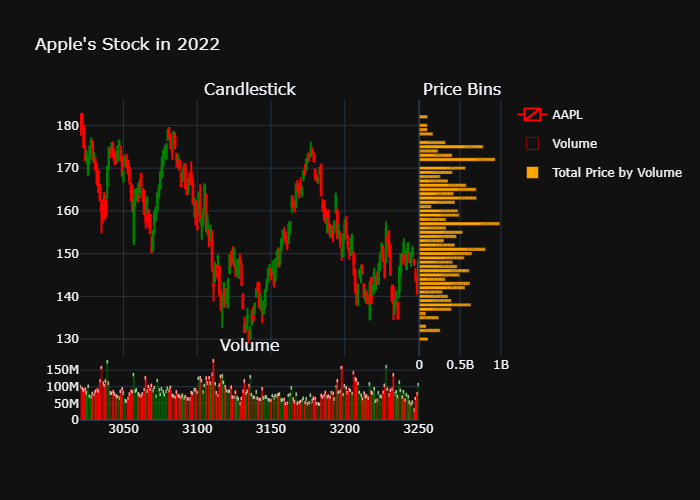

In [13]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)